# **Towards Building An Effective Multi-Label Image Classification Model** <br>

## **STINTSY Technical Report**

### **S14 - Group 3**:
- Jadie, Joshue Salvador A.
- Lopez, Angel L.
- Ponce, Andre Dominic H.

<br>

##### **Last Updated**: 07/04/22

## **Task**

### **Multi-Label Image Classification**
Multi-label image classification is a type of image classification that predicts the probability of each class in a single image of the dataset (Draelos, 2019). In contrast to binary or multi-class image classification models, wherein they classify images as belonging to **one** of two or more classes, a multi-label image classification model classifies images as belonging to **two or more classes** (Draelos, 2019).

In this notebook, the goal is to build a good model that performs the task on a chosen image dataset, producing a **high-enough** prediction accuracy. The training of the model is done using the **supervised learning** approach.

The image dataset to perform the task on is the **Tom and Jerry Image Classification Dataset** which is a recently made dataset in **Kaggle**.

## **Task Dataset**

### **Tom and Jerry Image Classification Dataset**

<img src="References/tomandjerry.jpg" width="300"/>

One of the famous cartoon shows, *Tom and Jerry* is an American animated media franchise and series of comedy short films produced in 1940 by *William Hanna* and *Joseph Barbera*. The series centers on the rivalry between the titular characters of a cat named *Tom* and a mouse named *Jerry* (Baskar, n.d.). 

The Kaggle dataset was produced by **Bala Baskar**. It contains `5478` images extracted from a set of Tom and Jerry episode videos that are available online. The images were acquired by converting the videos into images with 1 frame per second (FPS) (Baskar, n.d.). Based on the dataset, an image can be classified as either `Tom`, `Jerry`, both `Tom` and `Jerry`, or none at all. The classification also means if Tom, Jerry, or both of them are present in the image.

Along with this, a comma-separated values (csv) file named `ground_truth` is also provided containing the **ground truth** labels for each image which allows for **supervised** learning. According to Baskar (n.d.), the labeling for each images was done manually therefore the **accuracy** of the ground truth labels in the csv file is `100%`.
<br><br>

#### **Dataset Source**: [Kaggle](https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification)

## **Requirements**

Below are the dataset files and Python modules to be used throughout this notebook.

**Tom and Jerry Image Classification Dataset**
- `tom` - folder which contains images wherein **Tom** is only present.
- `jerry` - folder which contains images wherein **Jerry** is only present.
- `tom_jerry_1` - folder which contains image wherein both Tom and Jerry are **present**.
- `tom_jerry_0` - folder which contains images wherein both Tom and Jerry are **not present**.
- `ground_truth` - csv file which contains the **ground truth class labels** for each image.

**Python Modules**
- Pandas (`pandas`) ------> `pip install pandas`
- NumPy (`numpy`) ------> `pip install numpy`
- OpenCV (`cv2`) ------> `pip install opencv-python`
- Matplotlib ------> `pip install matplotlib`
- scikit-learn ------> `pip install scikit-learn`
- Keras ------> `pip install tensorflow`
- Keras Tuner ------> `pip install keras-tuner`
- Pillow ------> `pip install pillow`
- JupyterLab Widgets ------> `pip install jupyterlab_widgets`

## **Creating the Image Dataset and Data Preprocessing**

To construct our dataset, the initial features that we will be dealing with are the **images** themselves. As observed in the Kaggle dataset, the images are in `JPEG` format with a resolution of `1280x720`. 

With that said, each image will be resized as `224x224` images and are then converted to **3D numpy ndarrays** with the dimensions being `224x224x3`. The third dimension's value, which is `3`, represents the `RGB` channels as these are RGB images. The values in each 3D array, which are pixel values, are then normalized to `0-1` to allow for faster convergence later on in model training.

Each `instance` from the dataset is a single image (frame) extracted from a Tom and Jerry episode video. These instances can either have Tom, Jerry, both, or none present.

The reason as to why each image is resized to `224x224` is because it is the standard input size for the model architectures (Krizshevsky et al., 2012; Szegedy et al., 2016; Zeiler & Fergus, 2014) that we are about to implement later on in this notebook to achieve the task.

Let's preprocess and create the image dataset to be used for model training. First, Let's import all needed modules for data creation and exploration. Let's also import the **Tensorflow** module which will be used later on in constructing, training, and testing the models for the task.

In [218]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg

# to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline

# plot configurations
plt.rcParams['figure.figsize'] = (10, 10)

# fixed random number generator seed
np.random.seed(1)

The `create_img_dataset` function below produces the image dataset containing all of the pre-processed stored image data from each sub-folder of the specified image directory and their ground truth class labels.
* It will read the **ground truth file** containing the `ground truth class labels` for each image.
* It will read the image files from all **folders** of the specified image directory and convert them to the right color format (**RGB**).
* It will **resize** each image based on the set image dimensions, `224x224` as the default image dimension values.
* It will **convert** the image to a `numpy` array with `float32` as the datatype.
* It will **normalize** the image array to have values scaled down between **0 and 1** from 0 to 255 for a similar data distribution. This is done in order to have **faster convergence** later on in model training.

In [219]:
def create_img_dataset(img_dir, ground_truth, size=[224, 224]):
    # np ndarray containing the tom and jerry images represented 3D numpy ndarrays
    X = []
    # np ndarray containing the ground truth (y) labels for each image
    y = []
    
    # get ground truth labels and store them into a dataframe
    labels = pd.read_csv(ground_truth)
    
    # get and pre-process all images from each folder in the specified image 
    for sub_dir in os.listdir(img_dir):
        for img_file in os.listdir(os.path.join(img_dir, sub_dir)):
            # get image path
            img_path = os.path.join(img_dir, sub_dir, img_file)
            # read image, it will be on the defaukt BGR format first
            img = cv2.imread(img_path)
            # convert to RGB format
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # resize image according to set image dimensions
            img = cv2.resize(img, (size[0], size[1]), interpolation=cv2.INTER_AREA)
            # convert image to numpy array with float32 as data type
            img = np.array(img).astype('float32')
            # normalize the image array's values to 0-1
            img /= 255
            # store image in array
            X.append(img)
            # store image's ground truth class label, there must be a 'filename' column which
            # corresponds to the name of the current image file being stored
            y.append(labels[labels['filename'] == img_file].values[:, 1:].squeeze())
            
    # return the created image dataset as numpy ndarrays
    return np.array(X), np.array(y).astype(int)

Below are the image dimension values and image directory to be used for creating the image dataset. We chose `224x224` as the image dimension values for the dataset.

In [220]:
# image dimension values (width x height)
img_dims = [224,224]

# image directory of Tom and Jerry images
img_dir = 'tom_and_jerry/'

# file containing the ground truth labels for each image
ground_truth = 'ground_truth.csv'

With the function and configurations set, create the image dataset.

In [221]:
X, y = create_img_dataset(img_dir, ground_truth, img_dims)

## **Exploratory Data Analysis**

##### **_Identifying the number of images for each class_**

As there are two classes from the dataset which are `Tom` and `Jerry`, the number of images assigned to each class shall be identified. Along with these, the number of images wherein `both` or `none` of them are present shall also be determined. To do this, Let's use `y`, which is the numpy array containing the **ground truth class labels** for each image, to determine the number of images for each class. 

Since the task being performed is **multi-label** image classification, each image will have two `y` values indicating if `Tom` and `Jerry` are present in the image or not. The first `y` value indicates to the presence of `Tom` in the image while the second `y` value indicates to the presence of `Jerry` in the image. The values for `y` are only `0` or `1` wherein `0` tells that Tom or Jerry is not present in the image while `1` tells that Tom or Jerry is present in the image.

To confirm the statement above, Let's view the `ground_truth` csv file where the `y` numpy array was created from.

In [222]:
# read ground_truth csv file and store it as a dataframe
df_gt = pd.read_csv(ground_truth)

# display the first 5 rows only
df_gt.head()

,filename,tom,jerry
0,frame0.jpg,0,0
1,frame1.jpg,0,0
2,frame2.jpg,0,0
3,frame3.jpg,0,0
4,frame4.jpg,0,0


From the `ground_truth` csv file, we can see that the first column `tom` indicates **Tom**'s presence in the image while the second column `jerry` indicates **Jerry**'s presence in the image. For example, the first image which has a filename of `frame0.jpg` has both Tom and Jerry **not present** in the image since the values for both columns are `0`.

Let's now get all unique rows (1D numpy arrays) and get the number of images for each.

In [223]:
# get all unique rows (1D numpy arrays) and the number of images for each
unique, num_of_imgs = np.unique(y, axis=0, return_counts=True)

Let's view the unique rows from the `y` numpy array.

In [224]:
unique

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

We can see that there are `4` unique 1D numpy arrays from `y`. The array with values `0, 0` indicates that **both Tom and Jerry** are **not present** in the image, `0, 1` indicates that **only Jerry** is **present** in the image, `1, 0` indicates that **only Tom** is **present** in the image, and `1, 1` indicates that **both Tom and Jerry** are **present** in the image.

Next, Let's view the number of images for each unique row.

In [225]:
num_of_imgs

array([1528, 1240, 1930,  780], dtype=int64)

Let's visualize the results with a bar chart.

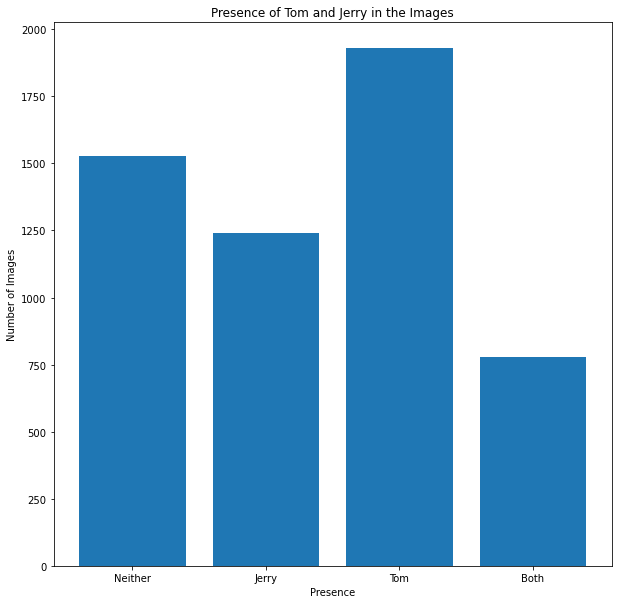

In [226]:
# create descriptive labels for each unique row from the `y` numpy array
labels = ['Neither', 'Jerry', 'Tom', 'Both']

# setup bar chart and its texts
plt.bar(labels, num_of_imgs)
plt.title("Presence of Tom and Jerry in the Images")
plt.xlabel("Presence")
plt.ylabel("Number of Images")

# display bar chart
plt.show()

As observed from the results, there are `1930` images wherein **only Tom** is **present**, `1240` images wherein **only Jerry** is **present**, `780` images wherein **both** are **present**, and `1528` images wherein **neither** of them are **present**.

Since there are lesser number of images wherein **Jerry** is present compared to the number of images wherein **Tom** is present, this can be a factor towards the performance of the models that will be built later on in this notebook.

##### **_Viewing a sample of images from the dataset_**

To familiarize ourselves with the data, Let's randomly view `20` images from the dataset.

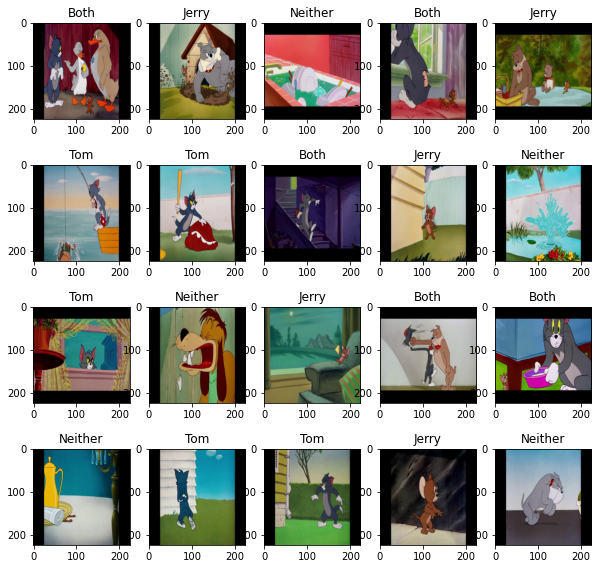

In [227]:
# display 20 random images from the dataset along with their ground truth class labels
for i in range(20):
    idx = np.random.randint(len(X))
    ax=plt.subplot(4, 5, i+1)
    
    # get descriptive class label
    if y[idx][0] == 0 and y[idx][1] == 0:
        classes = 'Neither'
    elif y[idx][0] == 0 and y[idx][1] == 1:
        classes = 'Jerry'
    elif y[idx][0] == 1 and y[idx][1] == 0:
        classes = 'Tom'
    else:
        classes = 'Both'
    
    # set descriptive label and display image
    ax.title.set_text(classes)
    plt.imshow(X[idx])

As observed above, we can see that the Tom and Jerry images have varying `brightnesses` and `backgrounds`. There are also different orientations per image, some images are shown in `portrait` while some images are shown in `landscape`. 

There are also images wherein only certain body parts of Tom or Jerry are shown such as their `tail` or `hands`, yet the ground truth class label for those images indicate that Tom or Jerry is **present** in that image. 

These observations will be useful later on in this notebook, as we determine and analyze the performance of the model that we will build to perform the task.

We also have observed that there are some images in the dataset wherein Tom and Jerry are distorted in their original size and shape. There are also images wherein only certain body parts of Tom and Jerry are shown. Here are some examples:

<img src="References/distorted-1.jpg" width="400" align="left"/>
<img src="References/distorted-2.jpg" width="400" align="left"/>
<img src="References/distorted-3.png" width="365" align="left"/>
<img src="References/distorted-4.png" width="400" align="left"/>

It will be a challenge for the models that we are going to build later on in terms of predicting the correct labels for these distorted images. This is due to the images having different features, and being hard to detect especially the **bottom-left** image wherein only a portion of Tom's face is shown. These images being on the dataset will help us later on in interpreting the results.

## **Model Training**

The algorithm that we are going to use towards building the model is `Convolutional Neural Network (CNN)`. Based on research, this is the **preferred** model algorithm for image classification since it effectively **lowers** the number of parameters handled in training given an image dataset. With lower number of parameters, this greatly improves the time it takes to learn as well as reduce the amount of data required to train the model (Lang, 2021). 

Unlike a network with fully connected layers wherein the number of parameters **grows rapidly** which makes the model training **computationally expensive** especially when training with images which are **high-dimensional**, a CNN solves this by lowering the number of parameters needed for training. It emphasizes the idea that a **local** understanding of the image is good enough since adjacent pixels in a specific location of an image are **similar** to one another (Lang, 2021). CNNs share the same parameters across the different locations of the image instead of treating each pixels as a separate feature, allowing for **easier** training.

With these said, CNN is the most effective and fit model when it comes to **image classification tasks and processing**. Given that images have **high dimensionality yet strong spatial correlation**, CNNs are very effective in reducing the number of parameters without losing on the model's quality. It **convolves** the input images, reducing their dimensions while retaining their **salient** features (Lang, 2021). This allows for **faster** processing during training.

CNNs are made up of **two** main components: the first component is for **feature extraction** and the second component is for **classification** (Lang, 2021). 

The first component is composed of the **convolutional**, **pooling**, and **flattening** layers. The **convolutional** layer is in charge of applying filters to the input image to extract its features. The outputs from the convolutional layer will then be passed on to the **pooling** layer which will **downsample** the outputs, or in other words, reduce the dimensions for faster processing. The pooling layer is used for **spatial dimensionality reduction**, it is done so that only the **most important** features are highlighted during training. Lastly, the **flattening** layer flattens the **pooled** output into a one-dimensional output which will then be passed on to the second component of CNN (Lang, 2021).

The second component consists of the final layer which is **fully connected**. As the final layer, it uses the output from the flattening layer and generates the **final prediction** of the input image. This prediction is a **probability value** which indicates the **class** that the image **belongs** to (Lang, 2021).

In order to achieve a good model with **high-enough** task accuracy on the Tom and Jerry image dataset, we will be experimenting on `3` different well-known CNN architectures. The CNN architectures that we will use to perform the multi-label image classification task on the dataset are as follows:
* `AlexNet` (Krizhevsky et al., 2012)
* `ZFNet` (Zeiler & Fergus, 2014)
* `InceptionNetV3` (Szegedy et al., 2016)

With this, a total of `3` **multi-label image classification** CNNs will be **trained, validated, and tested** on the Tom and Jerry dataset.

All CNN architectures chosen for the task defined the fixed image input size as `224x224` (Krizshevsky et al., 2012; Szegedy et al., 2016; Zeiler & Fergus, 2014). The fixed image input size is important to CNNs because of their defined layer architecture which also indicates how the images are going to be processed given their sizes (Lang, 2021). With this, we then decided that each image in the dataset will be resized to `224x224` before training the models.

##### **_Train/test/validation split_**

Before constructing the CNNs, Let's first split our Tom and Jerry image dataset into **train, test, and validation** sets. `80%` of the data will be placed on the **train** set, `10%` on the **test** set, and `10%` on the **validation** set.

Import the `train_test_split()` from `sklearn`.

In [228]:
from sklearn.model_selection import train_test_split

Divide the dataset first into train and test sets, where `20%` of the data will be placed into the test set. `random_state` is set to `1`.

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Now, divide the test set's data into half (`50%`), producing the test and validation sets. Both will have `10%` of the data. `random_state` is also set to `1`.

In [230]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

Display the shape of the train, validation, and test sets.

In [231]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_val', X_val.shape)
print('y_val', y_val.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4382, 224, 224, 3)
y_train (4382, 2)
X_val (548, 224, 224, 3)
y_val (548, 2)
X_test (548, 224, 224, 3)
y_test (548, 2)


The train set contains `4382` instances while both the validation and test sets contain `548` instances.

With the train, test, and validation sets created, Let's now proceed to creating the CNNs.

##### **_AlexNet_**

**AlexNet** (Krizshevsky et al., 2012) is a CNN architecture best known for winning the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012 competition by an immense error margin and can be credited with stimulating the rise in popularity of CNNs.

<img src="References/AlexNet.png" width="700"/>

The CNN architecture includes `5` convolutional layers and `3` max-pooling layers. It is also the first to introduce and use the **Rectified Linear Unit** (`ReLU`) as the **nonlinear activation function** (Krizshevsky et al., 2012). Compared to the `Tanh` activation function, `ReLU` is said to improve training speed due to **non-saturation** of gradients. The **max-pooling** layers are used to reduce error rate. Lastly, the architecture also made use of **drop-out** layers after the fully-connected layers to avoid **over-fitting**.

To create the **AlexNet** model in performing the task on the Tom and Jerry dataset, we will use Keras which is a **high level API** of TensorFlow for creating deep learning models.

Let's import all of the needed functions from `keras` to construct the AlexNet model. We will be using the `Sequential()` function of `keras` to resemble the architecture.

Additionally, this implementation was adapted from the Towards Data Science guide by Migmar (2021).

Implementation Source: [Towards Data Science](https://towardsdatascience.com/understanding-the-amazon-rainforest-with-multi-label-classification-vgg-19-inceptionv3-5084544fb655)

In [232]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, ZeroPadding2D, Dense, Flatten, Dropout
from keras.models import load_model

With the `keras` functions imported, Let's construct the AlexNet model for multi-label image classification.

In [233]:
# function to create an AlexNet model for multi-label image classification
def alex_net():
    # initialize with Sequential to create and connect model layers
    alexnet = Sequential()

    # first convolutional layer, convolve the image with a 11x11 kernel to get the features
    alexnet.add(Conv2D(input_shape=(224, 224, 3), filters=96, kernel_size=(11, 11), strides=(4, 4), padding="same", activation="relu"))
    # first max-pooling layer, get only the important features
    alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
    # first batch normalization layer, normalize the input values
    alexnet.add(BatchNormalization())

    # second convolutional layer, convolve the image with a 5x5 kernel
    alexnet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1, 1), padding="same", activation="relu"))
    # second max-pooling layer
    alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
    # second batch normalization layer
    alexnet.add(BatchNormalization())

    # third convolutional layer, convolve the image with a 3x3 kernel
    alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
    # third batch normalization layer
    alexnet.add(BatchNormalization())
    # fourth convolutional layer, convolve the image with a 1x1 kernel
    alexnet.add(Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), padding="same", activation="relu"))
    # fourth batch normalization layer
    alexnet.add(BatchNormalization())

    # last convolutional layer, convolve the image with a 1x1 kernel
    alexnet.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding="same", activation="relu"))
    # last max-pooling layer
    alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
    # last batch normalization layer
    alexnet.add(BatchNormalization())

    # flattening layer, flatten the output into a one-dimensional array
    alexnet.add(Flatten())

    # fully connected layers, dropout to avoid issue of overfitting
    alexnet.add(Dense(4096, activation="relu"))
    alexnet.add(Dropout(0.5))
    alexnet.add(Dense(4096, activation="relu"))
    alexnet.add(Dropout(0.5))

    # produce final prediction (probability)
    # sigmoid as activation function to predict the probability of Tom/Jerry being present in an image
    # produces two output probabilities: one for Tom's presence and the other one for Jerry's presence in the image
    alexnet.add(Dense(2, activation="sigmoid"))
    
    return alexnet

In [234]:
# create AlexNet model
alexnet = alex_net()

As observed in the code above, the nonlinear activation function used for the output layer is **sigmoid**. Though it might not be clearly visible since there are only `2` classes in the dataset which are `Tom` and `Jerry`, the **softmax** activation function cannot be used for **multi-label** image classification. 

This is because softmax can only be used for **mutually exclusive** class outputs (e.g. either cat or dog but not both) (Draelos, 2019). With more than 2 classes, softmax compares the probabilities of each class and chooses the class with the **highest probability** as the single label for the image. It is applicable to **multi-class** image classification but not for **multi-label** image classification wherein an input image can have more than one label (Draelos, 2019).

With that said, we use **sigmoid** to predict the probability of each class **separately** in an input image.

Let's display the summary of the AlexNet model.

In [235]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_94 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_95 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                        

Since we are using **sigmoid** as the output layer's activation function, and we are also trying to determine if Tom and Jerry are present in the image or not **separately**, we can view this as a **binary classification problem** but with `2` output probabilities (one for **Tom's presence** and one for **Jerry's presence**).

To optimize the AlexNet model for the task, we will be using **Binary Cross-Entropy** as the **loss function** given that the multi-label binary classification problem. Along with this, we will use **Adaptive Moment Estimation (Adam)** as the **optimizer** for the model, which is said to be the best overall optimizer choice due to **faster training**, **fewer parameters to tune**, and the **adaptive learning rate** that allows for achieving possible better model performance (Lang, 2021).

Let's now **define** binary cross-entropy and adam as the loss function and optimizer to be used for model optimization. We will use the `compile()` function of the created model to do this. For the metrics, we only need the **binary accuracy** to see how the model has performed. Binary accuracy is the accuracy calculated from how often the model's predictions match the **binary** labels. Since the model's predictions are going to be **float** values, Let's use this metric in order to match with the ground truth labels of the Tom and Jerry dataset which are **binary** values (0 or 1).

In [236]:
# define the loss function and optimizer to be used for optimizing the model, use binary_accuracy only for metrics
alexnet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

According to the API documentation of Keras (n.d.), **back propagation** is **automatically** done by the Keras system itself just by calling the `fit()` method of the created model. With that said, we just need to define the `batch_size` and number of `epochs` needed for optimizing the model. 

Before we train the AlexNet model, Let's first implement the **early stopping** method which will help mitigate overfitting during training with the `fit()` by monitoring the validation loss or accuracy. 

According to Mustafeez (n.d.), early stopping is an **optimization** technique used to reduce overfitting without compromising on model accuracy. Simply, the main idea behind this technique is to stop training before a model starts to overfit to get the best weights obtained from a specific epoch.

To do this, we will create an `EarlyStopping` callback object using Keras which will monitor the validation loss (`val_loss`) during training. Let's also set `patience` to `5` which is the number of epochs for the training to be continued after the halt. This is done just in case if the model's performance still improves through the succeeding epochs after the epoch that caused the training halt. We will also set `restore_best_weights` to `True` to retrieve the best weights of the model from a specific epoch after the halt.

In [237]:
# import callbacks module of keras for the earlystopping callback object
from keras import callbacks

# create EarlyStopping callback object to monitor validation loss per epoch
es = callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=5, restore_best_weights=True)

Let's now train the AlexNet model with the train set. We will also **initially** set the `batch_size` to `64` and the number of `epochs` to `50`. The validation set (`X_val` and `y_val`) will be used as `validation_data` for optimization. We will also set the `EarlyStopping` object as the callback after each epoch to monitor the **validation loss**. If the validation loss **increments**, the callback object will **halt** the training to avoid model overfitting.

In [238]:
# check if there already a saved trained AlexNet model 
if os.path.isfile('models/alexnet.h5'):
    # load saved trained AlexNet model
    alexnet = load_model('models/alexnet.h5')
else:
    # train new AlexNet model
    alexnet.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val), callbacks=[es])

With the AlexNet model trained and optimized using adam, Let's see how it will perform with the test set. Let's use the `evaluate()` function of the Keras model to get the AlexNet model's scores on the test dataset.

In [239]:
scores = alexnet.evaluate(X_test, y_test)

18/18 [==============================] - 25s 343ms/step - loss: 0.2707 - binary_accuracy: 0.8896


Let's get the model's predictions on the test set.

In [240]:
# get predictions on test set
predictions = alexnet.predict(X_test)

# display predictions
predictions

18/18 [==============================] - 5s 236ms/step


array([[0.999928  , 0.00518087],
       [0.95000935, 0.05624495],
       [0.19139484, 0.42452648],
       ...,
       [0.02880431, 0.07389123],
       [0.92372227, 0.05917706],
       [0.9840289 , 0.34679317]], dtype=float32)

Let's check how many correct predictions did the AlexNet model made on the test set. 

Based on the `binary_accuracy` metric as explained from the API documentation of Keras (n.d.), the correctness of a **multi-label** output is calculated by $\frac{n_{correct}}{n_{total}}$ wherein $n_{correct}$ is the number of correct labels in the output and $n_{total}$ is the total number of labels in the output. 

Since the dataset has 2 labels per output, one is for Tom and the other is for Jerry, the total number of labels is `2`. This makes it such that one correct label in an output adds `0.5` to the number of correct predictions.

Let's create the `compute_correct()` function below which gets the **number** of correct  predictions from the model on a specified dataset given **multi-label** outputs. The `predictions` is a numpy array containing the model's multi-label predictions on the dataset while the `actual` is a numpy array containing the actual `ground truth` multi-labels per each image in the dataset.

In [241]:
def compute_correct(predictions, actual):
    correct = 0
    pred = np.around(predictions) # evenly round off values based on 0.5 threshold
    for i in range(len(pred)):
        # if the model was able to detect Tom in the image
        if pred[i][0] == actual[i][0]:
            correct += 0.5
        # if the model was able to detect Jerry in the image
        if pred[i][1] == actual[i][1]:
            correct += 0.5
    return correct 

Let's now get the number of correct predictions as well as the accuracy of the model on the test set.

In [242]:
correct = compute_correct(predictions, y_test)

print("Number of correct predictions: {} / {}".format(correct, len(y_test)))
print("Test accuracy: {}".format(scores[1]))

Number of correct predictions: 487.5 / 548
Test accuracy: 0.889598548412323


Out of `548` test set instances, the AlexNet model was able to predict `487.5` instances correctly. The test accuracy achieved by the model is `88.9599`%.

Let's save the current configurations and weights of the AlexNet model for future usages.

In [243]:
# save AlexNet model to 'models' folder as a h5 file
alexnet.save('models/alexnet.h5')

##### **_ZFNet_**

**ZFNet** (Zeiler & Fergus, 2014) is a very similar architecture to **AlexNet** except for a few minor modifications. Instead of using `11x11` sized filters in the first layer, which is what AlexNet implemented, ZFNet uses `7x7` sized filters and a decreased stride (kernel step) value. This was done because a smaller filter size in the first convolution layer helps retain a lot of original pixel information in the input volume. Based on their findings, a filtering of size `11x11` in the first convolutional layer proved to be skipping a lot of relevant information.

<img src="References/ZFNet.png" width="600" />

ZFNet is the **ILSVRC 2013** winner. The network has relatively fewer parameters than **AlexNet**, but still outperforms it on the **ILSVRC 2012** classification task by achieving top accuracy with only `1000` images per class. It was an improvement on AlexNet by tweaking the architecture hyperparameters.

Let's construct the ZFNet model for multi-label image classification using Keras. Let's compile the model also with **Binary Cross-Entropy** as loss function, **Adam** as the optimizer, and **binary accuracy** only for performance metrics. 

The implementation was inspired from the Towards Data Science guide of Migmar (2021).

Link to guide: [Towards Data Science](https://towardsdatascience.com/understanding-the-amazon-rainforest-with-multi-label-classification-vgg-19-inceptionv3-5084544fb655)

In [244]:
# function for creating a ZFNet model for multi-label image classification
def zf_net():
    # replicate ZFNet architecture using Sequential
    zfnet = Sequential()

    # first convolutional layer (96x7x7)
    zfnet.add(Conv2D(input_shape=(224,224,3), filters = 96, kernel_size = (7,7), strides = (2,2), activation = "relu"))
    zfnet.add(BatchNormalization())
    zfnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="same"))

    # second convolutional Layer (256x5x5)
    zfnet.add(Conv2D(filters = 256, kernel_size = (5,5), strides = (2,2), activation = "relu"))
    zfnet.add(BatchNormalization())
    zfnet.add(MaxPool2D(pool_size = (3,3), strides=(2,2), padding="same"))

    # third convolutional layer (384x3x3)
    zfnet.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding="same", activation = "relu"))

    # fourth convolutional layer (384x3x3)
    zfnet.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1), padding="same", activation = "relu"))

    # last convolutional layer (256x3x3)
    zfnet.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), padding="same", activation = "relu"))
    zfnet.add(MaxPool2D(pool_size = (3,3), strides=(2,2)))

    zfnet.add(Flatten())
    zfnet.add(Dense(4096, activation="relu"))
    zfnet.add(Dropout(0.5))

    zfnet.add(Dense(4096, activation="relu"))
    zfnet.add(Dropout(0.5))

    # output 2 probabilities for both Tom and Jerry's presence in the image
    zfnet.add(Dense(2, activation='sigmoid'))
    
    return zfnet

In [245]:
# create the ZFNet model 
zfnet = zf_net()

# define loss function, optimizer, and performance metric
zfnet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

Display the summary of the ZFNet model.

In [246]:
zfnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 109, 109, 96)      14208     
                                                                 
 batch_normalization_99 (Bat  (None, 109, 109, 96)     384       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 55, 55, 96)       0         
 2D)                                                             
                                                                 
 conv2d_100 (Conv2D)         (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_100 (Ba  (None, 26, 26, 256)      1024      
 tchNormalization)                                               
                                                      

Train the ZFNet model with batch size of `64` and `50` epochs. Let's also use **early-stopping** to halt the training when there is potential overfitting.

In [247]:
# if there is already a saved trained ZFNet model
if os.path.isfile('models/zfnet.h5'):
    # load saved trained ZFNet model
    zfnet = load_model('models/zfnet.h5')
else:
    # train new ZFNet model
    zfnet.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val), callbacks=[es])

Let's see how the ZFNet model will perform on the test set.

In [248]:
scores = zfnet.evaluate(X_test, y_test)

18/18 [==============================] - 18s 345ms/step - loss: 0.3733 - binary_accuracy: 0.8595


Let's get the ZFNet model's number of correct predictions on the test set.

In [249]:
predictions = zfnet.predict(X_test)

predictions

18/18 [==============================] - 7s 323ms/step


array([[9.9547064e-01, 1.2071312e-03],
       [5.0236911e-01, 6.3511770e-04],
       [5.8206398e-02, 3.0006453e-01],
       ...,
       [5.5822253e-01, 4.4160791e-02],
       [4.0757883e-01, 1.7038591e-02],
       [9.9996358e-01, 9.9888879e-01]], dtype=float32)

In [250]:
correct = compute_correct(predictions, y_test)

print("Number of correct predictions: {} / {}".format(correct, len(y_test)))
print("Test accuracy: {}".format(scores[1]))

Number of correct predictions: 471.0 / 548
Test accuracy: 0.8594890236854553


Based on the results, the ZFNet model was able to predict `471.0` instances correctly out of `548` instances. The test accuracy achieved by the model is `85.9489`%. 

As of now, the AlexNet model performs **better** than the ZFNet model on the test dataset by a difference of `3`%.

Let's save the current configurations and weights of the ZFNet model for future usages.

In [251]:
zfnet.save('models/zfnet.h5')

##### **_InceptionNetV3 with Transfer Learning_**

The original **InceptionNet** CNN was introduced through a paper by Szegedy et al. (2016). Since then, various improvements has been made on top of it, and newer iterations were released such as **InceptionNetv2** (Szegedy et al., 2016), **InceptionNetv3** (Szegedy et al., 2016), and **InceptionNetv4** (Szegedy et al., 2016). In this section, we will be working with the third iteration of InceptionNet (InceptionNetV3).

The original InceptionNet (Szegedy et al., 2016) utilized stacked **inception modules** in creating the general architecture of the CNN. The contents of this module is shown in the figure below. The main purpose of this module is to reduce the number of input channels by using a number of **1x1 convolution layers**.

<img src="References/InceptionNet_InceptionModule.png" width="500"/>

Szegedy et al. (2016) stacked and connected a number of these inception modules along with some other layers together, and they were able to come up with the following architecture for the original InceptionNet:

<img src="References/InceptionNet_Architecture.png" width="500"/>

InceptionNetv3 incorporated the upgrades from InceptionNetv2 while adding some other upgrades such as the use of **RMSProp Optimizer**, **Factorized 7x7 convolutions**, **Batch normalization in the Auxillary Classifiers**, and **Label Smoothing** (Szegedy et al., 2016).

In using the InceptionNetv3 model in performing the needed task on the Tom and Jerry dataset, we will be using the InceptionNetv3 implementation of `keras`. However, we will not be training it from the ground up. Instead, we will be using **transfer learning** by adding additional layers on top of the original InceptionNetv3 model.

To define **transfer learning**, it is a learning method where a model that was developed for a task is reused as the starting point for a model on another task (Brownlee, 2019). It is a popular approach in deep learning where pre-trained models are used as the starting point on certain tasks, as it makes training easier and faster with just a bit of fine-tuning.

The implementation was adapted from the Towards Data Science guide by Migmar (2021).

Link to guide: [Towards Data Science](https://towardsdatascience.com/understanding-the-amazon-rainforest-with-multi-label-classification-vgg-19-inceptionv3-5084544fb655)

Let's import additional modules needed for constructing the InceptionNetV3 model using the transfer learning method.

In [252]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model

In [253]:
# get InceptionV3 model that was pretrained on the ImageNet dataset
pretrained = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# make layers of the pre-trained model untrainable for transfer learning
for layer in pretrained.layers:
    layer.trainable = False

# get output of pre-trained model
model = pretrained.output

# additional layers for the task
model = MaxPool2D(pool_size=(5,5), strides=(2,2))(model)
model = Flatten()(model)
model = Dense(4096, activation="relu")(model)
model = Dropout(0.1)(model)

# output two probabilities for Tom and Jerry's presence
output = Dense(2, activation="sigmoid")(model)

inceptionv3 = Model(inputs=pretrained.input, outputs=output)

inceptionv3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"])

Let's now train the model on the dataset using transfer learning.

In [254]:
# check if there is already a saved trained InceptionV3 model
if os.path.isfile('models/inceptionv3.h5'):
    # load saved trained InceptionV3 model
    inceptionv3 = load_model('models/inceptionv3.h5')
else:
    # train new InceptionV3 model
    inceptionv3.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val), callbacks=[es])

Let's now evaluate the model on the test set.

In [255]:
scores = inceptionv3.evaluate(X_test, y_test)

18/18 [==============================] - 21s 745ms/step - loss: 0.3726 - binary_accuracy: 0.8458


Let's get the InceptionNetV3 model's number of correct predictions on the test set.

In [256]:
predictions = inceptionv3.predict(X_test)

predictions

18/18 [==============================] - 20s 751ms/step


array([[0.9504115 , 0.06418236],
       [0.6640871 , 0.13928361],
       [0.90468687, 0.6084318 ],
       ...,
       [0.54646   , 0.03044248],
       [0.9737348 , 0.06408367],
       [0.9029559 , 0.8938729 ]], dtype=float32)

In [257]:
correct = compute_correct(predictions, y_test)

print("Number of correct predictions: {} / {}".format(correct, len(y_test)))
print("Test accuracy: {}".format(scores[1]))

Number of correct predictions: 463.5 / 548
Test accuracy: 0.845802903175354


Based on the results, the InceptionNetV3 model was able to predict `463.5` instances correctly out of `548` instances. The test accuracy achieved by the model is `84.5802`%. 

Currently, the InceptionNetV3 model is the worst-performing model among the three models.

Let's save the current configurations and weights of the InceptionNetV3 model for future usages.

In [258]:
inceptionv3.save('models/inceptionv3.h5')

Heres a summary of the results obtained from building and training each model:
<br><br>

| Model           | Number of Correct Predictions | Test Accuracy |
|-----------------|-------------------------------|---------------|
| AlexNet         | 487.5 / 548                   | 88.9599%      |
| ZFNet           | 471.0 / 548                   | 85.9489%      |
| InceptionNetV3* | 463.5 / 548                   | 84.5802%      |

(*) With transfer learning

## **Model Selection and Hyperparameter Tuning**

Let's now proceed to tuning the hyperparameters of each model to achieve the best performance for each.

We will be using **Keras Tuner** to tune the hyperparameters of each CNN model. It is a scalable hyperparameter optimization API framework developed by Keras (n.d.) for easy hyperparameter tuning. It comes with many hyperparameter tuning methods such as **Random Search, Hyperband, and Bayesian Optimization**.

Let's now import the Keras Tuner module (`keras_tuner`) for hyperparameter tuning.

In [259]:
import keras_tuner as kt

#### **_Tuning the hyperparameters of AlexNet_**

For our AlexNet model, we will only tune the initial learning rate of the Adam optimizer. The architecture and the parameters for each of its layers will not be tuned anymore given that it is already the best parameters that achieved a very high accuracy on the **ImageNet** benchmark dataset (Krizshevsky et al., 2012). We assume that this parameters are already optimized which will achieve the best possible performance of AlexNet on the task and dataset given `224x224` input images.

Let's first import the `Adam` function from the optimizers module of Keras so that we can initialize the Adam optimizer with a specific learning rate, which is the hyperparameter being tuned in this model.

In [260]:
from keras.optimizers import Adam

Let's now create the function `alex_net_tuner()` which is the required build function to be used by the keras tuner system in order to tune the hyperparameters. The `hp` parameter is the parameter passed by the keras tuner system to tune the specified hyperparameters. 

In [261]:
# hp here is the parameter passed by Keras Tuner for tuning the specified hyperparameters
def alex_net_tuner(hp):
    alexnet = alex_net()
    
    # tune the learning rate of the adam optimizer
    # we use hp.Choice() to define the learning rate values to be used for each training trial
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    alexnet.compile(optimizer=Adam(learning_rate=hp_learning_rate), 
                    loss='binary_crossentropy', 
                    metrics=['binary_accuracy'])
    
    return alexnet

Let's use the **Random Search** method for tuning the learning rate hyperparameter. We will use the `RandomSearch()` function of Keras Tuner to create a **tuner** object that will perform random search for hyperparameter tuning. Additionally, we will set the performance objective of the tuner to be the validation loss of the model. Let's also save the results of the tuner in a directory called `tuned_models` and sub-directory called `tuned_alexnet`.

In [262]:
tuner_alexnet = kt.RandomSearch(
    alex_net_tuner, objective='val_loss', directory='tuned_models', project_name='tuned_alexnet')

INFO:tensorflow:Reloading Oracle from existing project tuned_models\tuned_alexnet\oracle.json
INFO:tensorflow:Reloading Tuner from tuned_models\tuned_alexnet\tuner0.json


Let's call the `search_space_summary()` function of the tuner to display its current configurations.

In [263]:
tuner_alexnet.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


Let's now search for the best learning rate for the Adam optimizer of the AlexNet model.

In [264]:
# if there is no saved tuned AlexNet model
if not os.path.isfile('tuned_models/tuned_alexnet.h5'):
    # get best AlexNet model with hyperparameters
    tuner_alexnet.search(
        X_train, y_train, epochs=50, validation_data=(X_val, y_val), 
        callbacks=[callbacks.EarlyStopping(monitor='val_loss', mode='auto', 
                                           patience=5, restore_best_weights=True)], 
        verbose=2)
else:
    # reload tuner model for getting the saved tuned AlexNet model
    tuner_alexnet.reload()

Let's get the best learning rate by calling the `get_best_hyperparameters()` function of the tuner.

In [265]:
best_hps_alexnet = tuner_alexnet.get_best_hyperparameters()[0]

In [266]:
best_hps_alexnet.values

{'learning_rate': 0.0001}

The best Adam optimizer learning rate to achieve the best possible performance of AlexNet on the task and dataset is `0.0001`.

Let's get the AlexNet model with the best Adam optimizer initial learning rate.

In [267]:
best_alexnet = tuner_alexnet.get_best_models(num_models=1)[0]

Let's evaluate the best AlexNet model on the test set

In [268]:
scores = best_alexnet.evaluate(X_test, y_test)

18/18 [==============================] - 4s 215ms/step - loss: 0.2235 - binary_accuracy: 0.9307


Let's get the number of correct predictions on the test set.

In [269]:
predictions = best_alexnet.predict(X_test)

predictions

18/18 [==============================] - 4s 193ms/step


array([[9.9998128e-01, 7.9796620e-04],
       [9.9947757e-01, 8.1431115e-04],
       [1.7562994e-01, 7.4172413e-01],
       ...,
       [6.2247965e-02, 6.0390666e-02],
       [9.9711180e-01, 1.2136212e-02],
       [9.9999887e-01, 9.9979973e-01]], dtype=float32)

In [270]:
correct = compute_correct(predictions, y_test)

print("Number of correct predictions: {} / {}".format(correct, len(y_test)))
print("Test accuracy: {}".format(scores[1]))

Number of correct predictions: 510.0 / 548
Test accuracy: 0.930656909942627


The best AlexNet model was able to predict `510.0` out of `548` test set instances correctly, achieving a test accuracy of `93.0656`% which is `4`% higher than the previously trained AlexNet model.

Let's save the best AlexNet model's weights and configuration for future usages.

In [271]:
best_alexnet.save('tuned_models/tuned_alexnet.h5')

#### **_Tuning the hyperparameters of ZFNet_**

For the ZFNet model, we will also tune only the learning rate hyperpameter of the Adam optimizer. We assume also that the parameters for each layer in the architecture were already optimized given its performance in the ImageNet benchmark dataset.

Let's create the build function for tuning the learning rate hyperparameter.

In [272]:
def zf_net_tuner(hp):
    zfnet = zf_net()
    
    # tune the learning rate of the adam optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    zfnet.compile(optimizer=Adam(learning_rate=hp_learning_rate), 
                    loss='binary_crossentropy', 
                    metrics=['binary_accuracy'])
    
    return zfnet

Let's create the random search tuner object.

In [273]:
tuner_zfnet = kt.RandomSearch(
    zf_net_tuner, objective='val_loss', directory='tuned_models', project_name='tuned_zfnet')

INFO:tensorflow:Reloading Oracle from existing project tuned_models\tuned_zfnet\oracle.json
INFO:tensorflow:Reloading Tuner from tuned_models\tuned_zfnet\tuner0.json


Display the current configurations of the tuner.

In [274]:
tuner_zfnet.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


Search for the best learning rate hyperparameter.

In [275]:
# if there is no saved tuned ZFNet model
if not os.path.isfile('tuned_models/tuned_zfnet.h5'):
    # get best hyperparameters for ZFNet model
    tuner_zfnet.search(
        X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val), 
        callbacks=[callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=5, 
                                           restore_best_weights=True)], 
        verbose=2)
else:
    # reload tuner model for getting the saved tuned ZFNet model
    tuner_zfnet.reload()

Get the best learning rate.

In [276]:
best_hps_zfnet = tuner_zfnet.get_best_hyperparameters()[0]

In [277]:
best_hps_zfnet.values

{'learning_rate': 0.001}

The best learning rate for the Adam optimizer of the ZFNet model is `0.001`.

Let's now get the ZFNet model with the best Adam optimizer initial learning rate.

In [278]:
best_zfnet = tuner_zfnet.get_best_models(num_models=1)[0]

Evaluate the best ZFNet model on the test set.

In [279]:
scores = best_zfnet.evaluate(X_test, y_test)

18/18 [==============================] - 6s 326ms/step - loss: 0.3929 - binary_accuracy: 0.8412


Get the number of correct predictions.

In [280]:
predictions = best_zfnet.predict(X_test)

predictions

18/18 [==============================] - 6s 324ms/step


array([[1.0000000e+00, 2.7433800e-09],
       [9.9914122e-01, 3.5091389e-02],
       [2.7521855e-01, 1.6049264e-01],
       ...,
       [1.3033488e-01, 5.9262771e-02],
       [9.8169237e-01, 5.5657446e-02],
       [9.9958611e-01, 8.8670409e-01]], dtype=float32)

In [281]:
correct = compute_correct(predictions, y_test)

print("Number of correct predictions: {} / {}".format(correct, len(y_test)))
print("Test accuracy: {}".format(scores[1]))

Number of correct predictions: 461.0 / 548
Test accuracy: 0.8412408828735352


Based on the results, the best ZFNet model was able to predict `461.0` out of `548` test set instances correctly with a test accuracy of `84.1240`%. 

Compared to the previously trained ZFNet model, its accuracy is lower by ~`2`%. However, this does not always mean the higher the accuracy, the better. The loss should be also taken into account as it determines how big the model's errors are on some data. Since the minimum loss achieved by the previously trained ZFNet model is `0.2772` while the best ZFNet model's minimum achieved loss is `0.2482`, this indicates that the best ZFNet model could be better than the previously trained model. The loss also means the distance between the ground truth values and the predicted values (Brownlee, 2019). In this case, the errors made by the previously trained ZFNet model on some data are bigger compared to the best ZFNet model.

Let's save the best ZFNet model's weights and configurations for future usages.

In [282]:
best_zfnet.save('tuned_models/tuned_zfnet.h5')

#### **_Tuning the hyperparameters of InceptionNetV3_**

Let's now further optimize the InceptionNetV3 model. There are `2` hyperparameters that we are going to tune for this model, the Adam optimizer **learning rate** and the **rate** of the `Dropout` layer before the `Dense` output layer.

Let's create the build function for tuning the dropout rate and the optimizer learning rate.

In [283]:
def inceptionv3_tuner(hp):
    pretrained = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

    for layer in pretrained.layers:
        layer.trainable = False
    
    model = pretrained.output
    model = MaxPool2D(pool_size=(5,5), strides=(2,2))(model)
    model = Flatten()(model)
    model = Dense(4096, activation="relu")(model)
    
    # tune the dropout rate 
    hp_dropout = hp.Float('rate', min_value=0.1, max_value=0.5, step=0.1)
    model = Dropout(hp_dropout)(model)
    
    output = Dense(2, activation="sigmoid")(model)

    inceptionv3 = Model(inputs=pretrained.input, outputs=output)
    
    # tune the learning rate for the adam optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    inceptionv3.compile(optimizer=Adam(learning_rate=hp_learning_rate), 
                        loss='binary_crossentropy', 
                        metrics=['binary_accuracy'])
    
    return inceptionv3

Let's create the random search tuner.

In [284]:
tuner_inceptionv3 = kt.RandomSearch(
    inceptionv3_tuner, objective='val_loss', directory='tuned_models', max_trials=20,
    project_name='tuned_inceptionv3')

INFO:tensorflow:Reloading Oracle from existing project tuned_models\tuned_inceptionv3\oracle.json
INFO:tensorflow:Reloading Tuner from tuned_models\tuned_inceptionv3\tuner0.json


Display the current configurations of the tuner.

In [285]:
tuner_inceptionv3.search_space_summary()

Search space summary
Default search space size: 2
rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


Search for the best dropout rate and learning rate hyperparameters.

In [286]:
# if there no saved tuned InceptionV3 model
if not os.path.isfile('tuned_models/tuned_inceptionv3.h5'):
    # get best hyperparameters for InceptionV3
    tuner_inceptionv3.search(
        X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val), 
        callbacks=[callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=5, 
                                           restore_best_weights=True)], 
        verbose=2)
else:
    # reload tuner model for getting the saved tuned InceptionV3 model
    tuner_inceptionv3.reload()

Get the best hyperparameters.

In [287]:
best_hps_inceptionv3 = tuner_inceptionv3.get_best_hyperparameters()[0]

In [288]:
best_hps_inceptionv3.values

{'rate': 0.5, 'learning_rate': 0.0001}

The best rate for the last dropout layer is `0.5` while the best optimizer learning rate is `0.0001`.

Let's get the best InceptionNetV3 model and evaluate it on the test set.

In [289]:
best_inceptionv3 = tuner_inceptionv3.get_best_models(num_models=1)[0]

In [290]:
scores = best_inceptionv3.evaluate(X_test, y_test)

18/18 [==============================] - 17s 779ms/step - loss: 0.3102 - binary_accuracy: 0.8777


Let's now get the number of correct predictions on the test set.

In [291]:
predictions = best_inceptionv3.predict(X_test)

predictions

18/18 [==============================] - 21s 955ms/step


array([[0.9982557 , 0.0043341 ],
       [0.9682148 , 0.01727611],
       [0.9252871 , 0.49026382],
       ...,
       [0.830535  , 0.01129651],
       [0.97341925, 0.01730043],
       [0.99144316, 0.81598437]], dtype=float32)

In [292]:
correct = compute_correct(predictions, y_test)

print("Number of correct predictions: {} / {}".format(correct, len(y_test)))
print("Test accuracy: {}".format(scores[1]))

Number of correct predictions: 481.0 / 548
Test accuracy: 0.8777372241020203


The best InceptionNetV3 model was able to predict `481.0` out of `548` test set instances correctly with a test accuracy of `87.7737`%. 

Compared to the previously trained InceptionNetV3 model, its accuracy is ~`3`% higher. The minimum loss achieved by the previously trained InceptionNetV3 model is `0.2202` while the best InceptionNetV3 model's minimum achieved loss is `0.2055`. These indicates that the InceptionNetV3 model with the best found dropout rate and optimizer learning rate has a better performance than the previous model.

Let's save the best InceptionNetV3 model's weights and configurations for future usages.

In [293]:
best_inceptionv3.save('tuned_models/tuned_inceptionv3.h5')

Heres a summary of the results that we have obtained from tuning the chosen hyperparameters of each CNN model:
<br><br>

| Tuned Model    | Best Optimizer Learning Rate | Best Dropout Rate | Number of Correct Predictions | Test Accuracy |
|----------------|------------------------------|-------------------|-------------------------------|---------------|
| AlexNet        | 0.0001                       | (Not tuned)       | 510.0 / 548                   | 93.0656%      |
| ZFNet          | 0.001                        | (Not tuned)       | 461.0 / 548                   | 84.1240%      |
| InceptionNetV3 | 0.0001                       | 0.5               | 481.0 / 548                   | 87.7737%      |

From the results, the **tuned AlexNet model** is the best performing model among the three with a high test accuracy difference.

## **Data Augmentation**

We can further improve the performance of the model by performing data augmentation on the training dataset which increase the size of the data. According to Dwivedi (2020), data augmentation is a technique through which one can increase the size of the image training dataset without adding new instances. Techniques like shifting, zooming, rotating, and flipping are methods done to augment the data in order to increase the data size and possibly achieve better model performance.

To do data augmentation on the training dataset, we will be using the **ImageDataGenerator** class of Keras (n.d.) to do it automatically.

Let's import the `ImageDataGenerator` of Keras.

In [294]:
from keras.preprocessing.image import ImageDataGenerator

Let's then augment the training dataset with the ImageDataGenerator. We will rotate, shift, zoom, and flip each image horizontally and vertically. Let's set the `rotation_range` to be `5` which defines the degree range of random rotations, both `width_shift_range` and `height_shift_range` to `0.01` for range of shifts, and `zoom_range` to `0.2` for the range of zooms.

In [295]:
train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.01,  # horizontal shift
                                   height_shift_range=0.01, # vertical shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   vertical_flip=True,  # vertical flip
                                  )

Let's view a sample of the data from the augmented dataset.

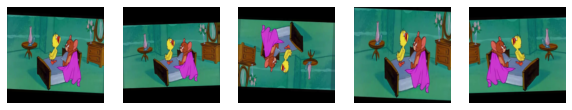

In [296]:
# augment/transform each image in the train set
augmented_imgs = train_datagen.flow(X_train[1:2], batch_size=1)

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(augmented_imgs.next().squeeze())
    plt.plot()
    
plt.show()

We can see each image in the output is the same image but rotated, horizontally flipped, vertically flipped, and zoomed.

Let's now train the best model with the augmented data. But before that, Let's create another EarlyStopping object with the `patience` value set to `10`. Let's see if with this `patience` value we will be able to obtain a better performance result for the current best model.

In [297]:
es2 = callbacks.EarlyStopping(monitor='val_loss', mode='auto', patience=10, restore_best_weights=True)

According to Keras (n.d.), if `fit()` is called again, it will use the **currently saved best weights of the model** from the previous called `fit()`. This means that we can continuously train and improve the model by calling `fit()` a number of times.

With the `flow()` function of ImageDataGenerator returning **only the augmented data** and not including the original data, we can train the best model again with augmented data using its currently saved best weights. 

Let's now train the best model again with the **augmented data only** and see if there are improvements in its performance.

In [298]:
# check if there is already a saved best model trained with augmented data
if os.path.isfile('best_model.h5'):
    # load saved best model trained with augmented data
    # there will be a tensorflow warning; ignore the warning
    best_alexnet = load_model('best_model.h5')
    best_alexnet.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['binary_accuracy'])
else:
    # train best model with augmented data only using its current best saved weights
    best_alexnet.fit(train_datagen.flow(X_train, y_train, batch_size=64, seed=2, shuffle=False),
                     epochs=50, validation_data=(X_val, y_val),
                     callbacks=[callbacks.EarlyStopping(monitor='val_loss', mode='auto', 
                                                        patience=10, restore_best_weights=True)])

Let's now evaluate the best model that was trained with augmented data on the test set.

In [299]:
scores = best_alexnet.evaluate(X_test, y_test)

18/18 [==============================] - 4s 189ms/step - loss: 0.1782 - binary_accuracy: 0.9453


Let's get the number of correct predictions on the test set.

In [300]:
predictions = best_alexnet.predict(X_test)

predictions

18/18 [==============================] - 4s 184ms/step


array([[9.9993932e-01, 1.5451389e-04],
       [8.9790165e-01, 1.5156408e-02],
       [5.8861357e-01, 2.4989814e-01],
       ...,
       [3.1391722e-03, 6.9354743e-01],
       [9.9997139e-01, 2.5650941e-05],
       [9.9992836e-01, 9.9978238e-01]], dtype=float32)

In [301]:
correct = compute_correct(predictions, y_test)

print("Number of correct predictions: {} / {}".format(correct, len(y_test)))
print("Test accuracy: {}".format(scores[1]))

Number of correct predictions: 518.0 / 548
Test accuracy: 0.94525545835495


Here is the summary of results:
<br> <br>

|                Model               | Number of Correct Predictions | Accuracy |
|:----------------------------------:|-------------------------------|----------|
| Initially Trained AlexNet          | 487.5 / 548                   | 88.9598% |
| Tuned AlexNet                      | 510.0 / 548                   | 93.0656% |
| Tuned AlexNet w/ Data Augmentation | 518.0 / 548                   | 94.5255% |

With data augmentation, the best model's test accuracy improved by `1.4599`. This goes to show that data augmentation is an effective technique to improve the performance of a model despite the low data size.

Let's now save the best model with its current best weights and configurations for future usages.

In [302]:
best_alexnet.save('best_model.h5')

## **Challenges in the Data**

From one of our previous observations in the EDA section of this notebook, there are images in the dataset wherein either Tom or Jerry are **distorted** in their original size, shape, or color. 

With that said, Baskar (n.d.) added an additional csv file titled `challenges` which provides the list of some distorted Tom and Jerry images in the dataset. This will help us to conveniently test our model and see if it can perform well on these distorted images in the dataset.

Let's now load the `challenges.csv` file and convert it into a pandas dataframe.

In [303]:
df_ch = pd.read_csv('challenges.csv')

Let's see how many distorted images there are from the list.

In [304]:
len(df_ch)

32

There are `32` distorted Tom and Jerry images to test with.

Let's view the first `5` rows of the `challenges` dataframe.

In [305]:
df_ch.head()

,folder,image_name
0,jerry,frame360.jpg
1,jerry,frame1794.jpg
2,jerry,frame1795.jpg
3,jerry,frame2231.jpg
4,jerry,frame2234.jpg


As observed, the first column `folder` is the name of the folder where the distorted image came from and the second column `image_name` is the filename of the image. We will use these values later on to load and preprocess each distorted image.

Let's now create the challenge dataset by loading and preprocessing the distorted images from the provided list of the `challenges.csv` file. We will also get the load the `ground_truth` csv file to create the ground truth labels array for this challenge dataset.

In [306]:
# np ndarray containing the distorted tom and jerry images represented 3D numpy ndarrays
X_ch = []
# np ndarray containing the ground truth (y) labels for each distorted image
y_ch = []

# get ground truth labels and store them into a dataframe
labels = pd.read_csv(ground_truth)

# get and pre-process all distorted images in the dataset
for i in range(len(df_ch)):
    # get current row values
    folder = df_ch.iloc[i, 0]
    img_file = df_ch.iloc[i, 1]
    # get image path
    img_path = 'tom_and_jerry/' + folder + '/' + img_file
    # read image, it will be on the defaukt BGR format first
    img = cv2.imread(img_path)
    # convert to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # resize image according to set image dimensions
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    # convert image to numpy array with float32 as data type
    img = np.array(img).astype('float32')
    # normalize the image array's values to 0-1
    img /= 255
    # store image in array
    X_ch.append(img)
    # store image's ground truth class label, there must be a 'filename' column which
    # corresponds to the name of the current image file being stored
    y_ch.append(labels[labels['filename'] == img_file].values[:, 1:].squeeze())

X_ch = np.array(X_ch)
y_ch = np.array(y_ch).astype(int)

Let's view all distorted images from the challenge dataset.

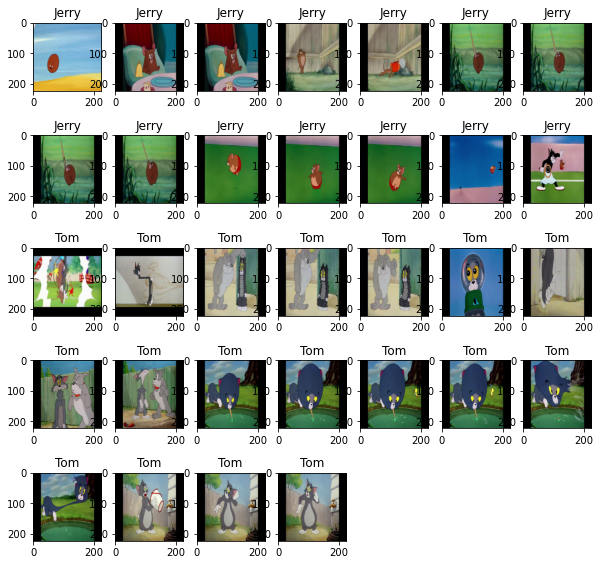

In [307]:
for i in range(len(X_ch)):
    ax=plt.subplot(5, 7, i+1)
    
    # get descriptive class label
    if y_ch[i][0] == 0 and y_ch[i][1] == 0:
        classes = 'Neither'
    elif y_ch[i][0] == 0 and y_ch[i][1] == 1:
        classes = 'Jerry'
    elif y_ch[i][0] == 1 and y_ch[i][1] == 0:
        classes = 'Tom'
    else:
        classes = 'Both'
    
    # set descriptive label and display image
    ax.title.set_text(classes)
    plt.imshow(X_ch[i])

Now let's test our best model on the challenge dataset and see if it can perform well. Let's first load our best model.

In [308]:
# running this cell will produce a tensorflow warning, ignore the warning
best_model = load_model('best_model.h5')
best_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['binary_accuracy'])

In [309]:
scores = best_model.evaluate(X_ch, y_ch)

1/1 [==============================] - 1s 766ms/step - loss: 0.0064 - binary_accuracy: 1.0000


Let's get the best model's number of correct predictions on the challenge dataset.

In [310]:
predictions = best_model.predict(X_ch)

predictions

1/1 [==============================] - 0s 433ms/step


array([[1.0405108e-02, 8.2416165e-01],
       [5.6916168e-08, 9.9998325e-01],
       [4.3742304e-08, 9.9999338e-01],
       [7.7326185e-05, 9.9951243e-01],
       [9.8719029e-04, 9.8830062e-01],
       [1.2079357e-06, 9.9999845e-01],
       [2.1296146e-06, 9.9999768e-01],
       [2.5811125e-05, 9.9996942e-01],
       [1.1255582e-06, 9.9999899e-01],
       [4.1455085e-08, 9.9930751e-01],
       [2.7008427e-09, 9.9999905e-01],
       [7.0454651e-09, 9.9999970e-01],
       [1.9435412e-03, 9.9195880e-01],
       [9.5749790e-05, 9.5904613e-01],
       [9.9968618e-01, 3.8940880e-02],
       [9.9789143e-01, 2.0948276e-02],
       [1.0000000e+00, 5.6303469e-07],
       [9.9999982e-01, 1.7406048e-05],
       [1.0000000e+00, 6.4829583e-06],
       [9.9968362e-01, 1.0855265e-03],
       [9.9958909e-01, 1.8719690e-04],
       [9.9999183e-01, 1.4778913e-04],
       [1.0000000e+00, 3.7413497e-07],
       [9.9990690e-01, 7.6467968e-03],
       [9.9999279e-01, 6.2163710e-03],
       [9.9993569e-01, 1.

In [311]:
correct = compute_correct(predictions, y_ch)

print("Number of correct predictions: {} / {}".format(correct, len(y_ch)))
print("Test accuracy: {}".format(scores[1]))

Number of correct predictions: 32.0 / 32
Test accuracy: 1.0


From the results, the best model was able to predict all `32` challenge set instances correctly. This shows that the model is able to detect both Tom or Jerry despite their distorted appearances.

## **Insights and Conclusion**

###### **_A trial-and-error approach is not efficient in creating CNNs_**

While we were testing different configurations of various CNN models, we came to realize that having the smallest of errors in the way we configured the architecture would cost us hours of training time – especially for slower machines. With this, we learned the importance of knowing how to specifically configure your model before you even start training it. Before even training the model, you must already be somewhat certain that it will do well.

###### **_Hardware constraints / limitations_**

In the duration of this project, we tried creating and training a lot of CNN models. Each took lots of hours to train on the machines (laptops) that we had. To make things worse, only a fraction of all these models led to feasible results. Some did not even start training at all due to hardware limitations. With this, we came to realize that having adequate hardware is as important as having a well-designed CNN architecture.

###### **_Input image size/resolution matters in CNNs._**

For the first few models that we trained, we used a larger dimension for our input images – which is 256x256. Upon reading more about the models that we ended up working with, we discovered that the original creators of these models used a resolution of 224x224 for their input images. As we had certain model configurations already that did well on a 256x256 resolution input, we decided to try the exact same configurations on a 224x224 input. This did not end well as we had to reconfigure each model to better fit an image dataset that is 224x224 in resolution. With this, we realized that even the slightest change in the formatting of your input would drastically change the way your model performs. Additionally, it is also about how the architecture and its layers were constructed. The layers are configured in a way that they are supposed to filter, process, and learn images with a specified input resolution. In other words, a specific input image resoltuion would lead to the proper processing and learning of the CNN model through its layers.

###### **_The best CNN architecture for a task varies._**

When we were looking for models to use in this project, we came across a few CNNs that were designed for other tasks such as image classification that involves single labels only. When we tried training the exact same CNN configurations for the multi-label classification of our Tom and Jerry data set, most models did not yield great results. Despite performing very well on the data sets originally used by our sources, it was not the case for our Tom and Jerry dataset. With this, we had to further tweak the model configurations that we found. With this, we came to realize that though a certain model configuration does well on a certain task, it is not guaranteed that it will also do well on another task – even if these tasks are very similar in nature (i.e., single-label image classification vs multi-label image classification).

###### **_Hyperparameter tuning helps_**

It is evident that performing hyperparameter tuning on the models that we have created in this project yielded better results compared to their non-tuned counterparts. However, it is worth noting that we only tweaked a small set of hyperparameters for the models that we used. For AlexNet and ZFNet, we only tuned the learning rate of its Adam optimizers. While for InceptionNetV3, we only tuned the dropout rate and the learning rate of its Adam optimizer. Though it yielded better results already, we realized that tweaking other hyperparameters in the CNN models such as the number of neurons, batch size, number of epochs, and the activation function used may further improve the performance of our models. Doing such may lead to AlexNet not being the best-performing model among the three. 

###### **_Data augmentation helps_**

It is given that the Tom and Jerry data set we are using for this project is small. It only contains a total of 5,478 images, and this is further divided into four classes: Tom, Jerry, both, and neither. Furthermore, we only used 80% of this to train our models. Afterwards, 10% goes to the validation set, and another 10% goes to the testing set. Though our models performed quite well already on the base dataset alone, we still attempted augmenting the data that we had in the hopes of further improving our best-performing model’s accuracy. By doing so, we were able to increase the best model (AlexNet)’s test accuracy from 93.0656% to 94.5255%. We realized that data augmentation really helps when working with smaller image datasets in the context of CNNs.

###### **_Increasing data size can improve results_**

Another method that we can do to improve the results of our CNN models is to add more Tom and Jerry images to the dataset. With more data, the models will be able to learn more complex patterns in the image and be able to improve their performance in predicting whether Tom, Jerry, or both are present in the images. Having more data is always a good idea in exchange for a longer training time but better performance. 

To add more images, there are available Tom and Jerry episode videos online in which we can download and extract the frames. This is something that we can do in our next machine learning projects to further improve our results.

###### **_More challenges on the data_**

We have also observed that there are certain images wherein our best model finds it difficult to predict the correct labels with. Some of the images are displayed below:

<img src="References/distorted-3.png" width="400" />
<img src="References/distorted-4.png" width="400" />
<br>

For both images, the best model did not detect either Tom or Jerry being present in the image even though they are there. This is because only certain parts of their body such as their heads are shown in the image. Especially with the top image, only a portion of Tom's face was shown, which truly makes it challenging for the model to detect him in that image.

Solutions are yet to be found towards improving the model such that it will be able to detect Tom and Jerry in these challenging images. One possible solution is to add more of these images to the dataset. As previously stated, the model will be able to possibly learn more complex patterns with more data.


###### **_CNNs are powerful model architectures for image classification_**

Lastly, we have learned a lot about CNNs and why they are the best model architectures for different image classification tasks. With their convolutional layers that reduces the number of parameters being learned from the images due to them having high spatial correlations, this allows for faster and efficient training.

In the duration of this project, we were able to construct and train three CNN models which are AlexNet, ZFNet, and InceptionNetV3. From the ImageNet benchmark dataset, there are more high-performing CNNs out there such as VGG-19, ResNet, DenseNet, and EfficientNet. It is our future goal to construct and train these CNN models which would possibly improve our current results. Along with this, it is also our goal to improve our hardware for effective and faster training of the CNN models given their architectures.

## **Best Model Display**

Let's now display the results of the best performing model on the test set. Let's load the best model.

In [312]:
# running this cell will produce a tensorflow warning, ignore the warning
best_model = load_model('best_model.h5')
best_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['binary_accuracy'])

Let's get the predictions of the best model on the test set.

In [313]:
predictions = best_model.predict(X_test)
pred = np.around(predictions) # evenly round off the values for getting the descriptive multi-labels

18/18 [==============================] - 4s 198ms/step


Let's visualize the results by showing `20` random images from the test set and the best model's prediction on each.

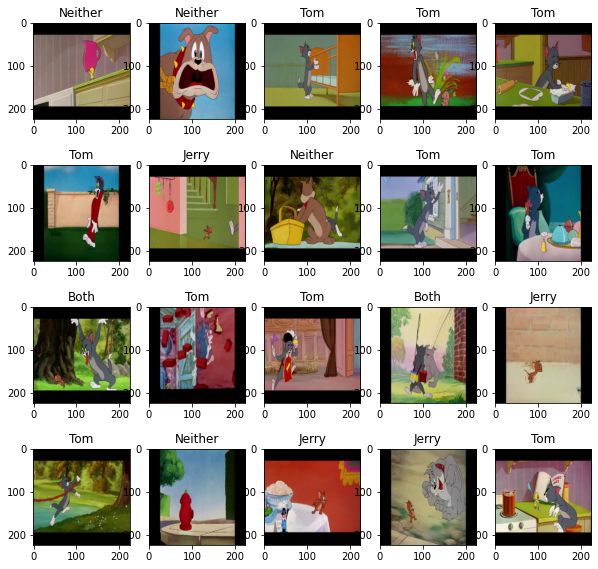

In [314]:
# display 20 random images from the test dataset along with the best model's predictions on each
for i in range(20):
    idx = np.random.randint(len(X_test))
    ax=plt.subplot(4, 5, i+1)
    
    # get descriptive class label
    if pred[idx][0] == 0 and pred[idx][1] == 0:
        classes = 'Neither'
    elif pred[idx][0] == 0 and pred[idx][1] == 1:
        classes = 'Jerry'
    elif pred[idx][0] == 1 and pred[idx][1] == 0:
        classes = 'Tom'
    else:
        classes = 'Both'
    
    # set descriptive label and display image
    ax.title.set_text(classes)
    plt.imshow(X_test[idx])

## **References**

- Baskar, B. (n.d.). Tom and Jerry Image Classification. Kaggle. Retrieved June 23, 2022, from https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification 
- Brownlee, J. (2019). A Gentle Introduction to Transfer Learning for Deep Learning. Retrieved June 22, 2022, from https://machinelearningmastery.com/transfer-learning-for-deep-learning/
- Draelos, R. (2019). Multi-label vs Multi-class Classification: Sigmoid vs. Softmax. Retrieved June 21, 2022, from https://glassboxmedicine.com/2019/05/26/classification-sigmoid-vs-softmax/
- Dwivedi, R. (2020). How Data Augmentation Impacts Performance of Image Classification, With Codes. Retrieved June 25, 2022 from https://analyticsindiamag.com/image-data-augmentation-impacts-performance-of-image-classification-with-codes/
- Keras (n.d.). Keras Documentation: Keras API reference. Keras. Retrieved June 26, 2022, from https://keras.io/api/ 
- Krizhevsky, A., Sutskever, I., &amp; Hinton, G. E. (2012). ImageNet classification with deep convolutional Neural Networks. Communications of the ACM, 60(6), 84–90. https://doi.org/10.1145/3065386 
- Lang, N. (2021). Using Convolutional Neural Network for Image Classification. Retrieved June 26, 2022, from https://towardsdatascience.com/using-convolutional-neural-network-for-image-classification-5997bfd0ede4
- Migmar, T. (2021). Understanding the Amazon Rainforest with Multi-Label Classification + VGG-19, Inceptionv3, AlexNet & Transfer Learning. Retrieved June 24, 2022, from https://towardsdatascience.com/understanding-the-amazon-rainforest-with-multi-label-classification-vgg-19-inceptionv3-5084544fb655
- Mustafeez, A. Z. (n.d.). What is early stopping? Retrieved June 23, 2022, from https://www.educative.io/answers/what-is-early-stopping
- Rausch, D. (2021). EDA for Image Classification. Retrieved June 24, 2022, from https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a
- Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J., & Wojna, Z. (2016). Rethinking the inception architecture for computer vision. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 2818-2826).
- Zeiler, M. D., & Fergus, R. (2014). Visualizing and understanding convolutional networks. In European conference on computer vision (pp. 818-833). Springer, Cham.